In [746]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

## Reading the file

In [747]:
df = pd.read_csv("//Users/jesuspetit/Desktop/Chucho/Ironhack/CareerWeek/technical_challenge_DA-master/data/measurements.csv")

In [748]:
#arrange features

def standardize(col):
    return col.lower().replace(" ","_")
newcolumns=[]
for col in df.columns.to_list():
    newcolumns.append(standardize(col))
df.columns=newcolumns

In [749]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [750]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   ac             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill_liters  13 non-null     object
 11  refill_gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


## Data Cleaning

To start, I must study feature by feature to get familiarized with the dataset and clean the information for better results.

### Distance

In [751]:
df["distance"].unique()

array(['28', '12', '11,2', '12,9', '18,5', '8,3', '7,8', '12,3', '4,9',
       '11,9', '12,4', '11,8', '24,7', '17,3', '33,4', '25,9', '25,3',
       '14,2', '17,9', '18,4', '18,3', '32,6', '19', '12,1', '20', '4,5',
       '11,7', '10,2', '5,4', '2', '16', '27,3', '10,6', '11,6', '13,1',
       '6,1', '153,5', '2,9', '2,1', '9,8', '6,8', '14', '13,9', '9,7',
       '24,8', '34,8', '5,2', '10,5', '13,2', '13', '12,2', '12,5',
       '15,7', '6,4', '5,3', '26,2', '18,8', '22,9', '162,7', '16,6',
       '15,9', '5,1', '22,4', '31,1', '16,1', '4,2', '17,4', '23,5', '7',
       '20,1', '20,8', '1,7', '35,9', '36,9', '16,8', '9,9', '36,6',
       '44,9', '21,6', '39,4', '26,6', '53,2', '18,9', '43,5', '16,4',
       '21,1', '22,7', '44,4', '35,8', '40,6', '14,1', '58,7', '16,2',
       '31,8', '51,6', '38,6', '81,2', '130,3', '67,2', '43,7', '56,1',
       '39', '38,5', '28,2', '19,6', '22,2', '13,6', '12,6', '8,7', '7,9',
       '2,4', '18,1', '1,3', '13,4', '12,8', '29', '31,4', '27,1', '

In [752]:
df["distance"].isna().sum()

0

In [753]:
df['distance'] = df['distance'].str.replace(',', '.').astype("float64")


In [754]:
df['distance'] = df['distance'].astype("float64")

In [755]:
df["distance"].unique()

array([ 28. ,  12. ,  11.2,  12.9,  18.5,   8.3,   7.8,  12.3,   4.9,
        11.9,  12.4,  11.8,  24.7,  17.3,  33.4,  25.9,  25.3,  14.2,
        17.9,  18.4,  18.3,  32.6,  19. ,  12.1,  20. ,   4.5,  11.7,
        10.2,   5.4,   2. ,  16. ,  27.3,  10.6,  11.6,  13.1,   6.1,
       153.5,   2.9,   2.1,   9.8,   6.8,  14. ,  13.9,   9.7,  24.8,
        34.8,   5.2,  10.5,  13.2,  13. ,  12.2,  12.5,  15.7,   6.4,
         5.3,  26.2,  18.8,  22.9, 162.7,  16.6,  15.9,   5.1,  22.4,
        31.1,  16.1,   4.2,  17.4,  23.5,   7. ,  20.1,  20.8,   1.7,
        35.9,  36.9,  16.8,   9.9,  36.6,  44.9,  21.6,  39.4,  26.6,
        53.2,  18.9,  43.5,  16.4,  21.1,  22.7,  44.4,  35.8,  40.6,
        14.1,  58.7,  16.2,  31.8,  51.6,  38.6,  81.2, 130.3,  67.2,
        43.7,  56.1,  39. ,  38.5,  28.2,  19.6,  22.2,  13.6,  12.6,
         8.7,   7.9,   2.4,  18.1,   1.3,  13.4,  12.8,  29. ,  31.4,
        27.1,  25.2,  14.3,  16.9,   9.2,  31.5,  24.9,  17. ,   7.4,
        25.7,  24.5,

I believe this feature refers to the distances of the trips made in the vehicle.

### Consume

In [756]:
df['consume'] = df['consume'].str.replace(',', '.').astype("float64")


In [757]:
df["consume"].unique()

array([ 5. ,  4.2,  5.5,  3.9,  4.5,  6.4,  4.4,  5.3,  5.6,  4.6,  5.9,
        5.1,  4.7,  4.9,  5.7,  4.1,  5.8,  4.8,  4.3,  5.2,  7.4,  6.5,
        4. ,  3.3,  9.9,  6.1,  6.2,  7.9, 12.2,  5.4,  3.6,  6.9,  8.7,
        6.3,  6. , 10.8,  8.1,  7.1,  3.8,  9. ,  3.7, 11.5,  6.6])

In [758]:
df["consume"].isna().sum()

0

This feature refers to the lts of gas consumed on each trip made on the vehicle.

### Speed

In [759]:
df["speed"].unique()

array([26, 30, 38, 36, 46, 50, 43, 40, 42, 59, 58, 24, 32, 39, 37, 62, 57,
       21, 28, 29, 35, 51, 23, 55, 44, 25, 63, 61, 82, 52, 18, 41, 20, 56,
       45, 22, 60, 33, 34, 71, 75, 66, 27, 49, 14, 80, 53, 47, 73, 69, 85,
       67, 54, 31, 48, 16, 88, 65, 90, 87])

In [760]:
df["speed"].isna().sum()

0

This feature refers to the avg speed of the vehicle during the trips realized.

### Temperature inside

In [761]:
df["temp_inside"].unique()

array(['21,5', '22,5', '20', nan, '21', '20,5', '23', '23,5', '25', '24',
       '22', '19', '24,5', '25,5'], dtype=object)

In [762]:
df['temp_inside'] = df['temp_inside'].str.replace(',', '.').astype("float64")


In [763]:
df["temp_inside"].isna().sum()

12

In [764]:
mean_temp_inside = df['temp_inside'].mean()
mean_temp_inside

21.929521276595743

In [765]:
df['temp_inside'].fillna(mean_temp_inside, inplace=True)


In [766]:
df["temp_inside"].unique()

array([21.5       , 22.5       , 20.        , 21.92952128, 21.        ,
       20.5       , 23.        , 23.5       , 25.        , 24.        ,
       22.        , 19.        , 24.5       , 25.5       ])

In [767]:
df["temp_inside"].isna().sum()

0

This feature indicates the temperature inside the car which is important because depending on the temperature of the AC we could spend more or less fuel.

### Temperature outside

In [768]:
df["temp_outside"].unique()

array([12, 13, 15, 14, 10, 11,  6,  4,  9,  0,  5,  3,  8,  1,  2,  7, -3,
       17, 18, -5, 16, 19, 21, 20, 25, 23, 27, 24, 26, 22, 30, 31, 28])

In [769]:
df["temp_outside"].isna().sum()

0

This feature I believe is important because maybe the gas spent is related to the temperature outside and inside of the car.

### Specials

In [770]:
df["specials"].unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [771]:
df["specials"].isna().sum()

295

In [772]:
df['specials'].fillna("None", inplace=True)

In [773]:
df["specials"].isna().sum()

0

In [774]:
df["specials"].unique()

array(['None', 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [775]:
df["specials"].value_counts()

None                  295
rain                   32
sun                    27
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: specials, dtype: int64

In [776]:
df['specials'] = df['specials'].apply(lambda x: 'AC' if x == 'ac' else x)

In [777]:
df['specials'] = df['specials'].apply(lambda x: 'AC rain' if x == 'ac rain' else x)

In [778]:
df['specials'] = df['specials'].apply(lambda x: 'AC sun' if x == 'AC Sun' else x)

In [779]:
df['specials'] = df['specials'].apply(lambda x: 'rain' if x == 'AC rain' else x)

In [780]:
df['specials'] = df['specials'].apply(lambda x: 'sun' if x == 'sun ac' else x)

In [781]:
df['specials'] = df['specials'].apply(lambda x: 'sun' if x == 'AC sun' else x)

In [782]:
df['specials'] = df['specials'].apply(lambda x: 'snow' if x == 'AC snow' else x)

In [783]:
df['specials'] = df['specials'].apply(lambda x: 'None' if x == 'AC' else x)

In [784]:
df["specials"].value_counts()

None                  309
rain                   42
sun                    32
snow                    4
half rain half sun      1
Name: specials, dtype: int64

This feature has information that we can obtained also from other columns and for that I believed is redundant.

### AC

In [785]:
df["ac"].unique()

array([0, 1])

In [786]:
df["ac"].value_counts()

0    358
1     30
Name: ac, dtype: int64

In [787]:
df["ac"].isna().sum()

0

In [788]:
df['ac'] = df['ac'].astype(str)
df['ac'] = df['ac'].map({'1': 'ON', '0': 'OFF'})


In [789]:
df["ac"].value_counts()

OFF    358
ON      30
Name: ac, dtype: int64

An important feature that indicated if the AC was on or off which can give us better or worst results of the type of gas used when the AC is on.

### Rain

In [790]:
df["rain"].unique()

array([0, 1])

In [791]:
df["rain"].value_counts()

0    340
1     48
Name: rain, dtype: int64

In [792]:
df["rain"].isna().sum()

0

I decide to drop this feature because the temperature depends on the weather so I belive its redundant.

### Sun

In [793]:
df["sun"].unique()

array([0, 1])

In [794]:
df["sun"].value_counts()

0    356
1     32
Name: sun, dtype: int64

In [795]:
df["sun"].isna().sum()

0

I decide to drop this feature because the temperature depends on the weather so I belive its redundant.

### Refill Liters

In [796]:
df["refill_liters"].unique()

array(['45', nan, '37,6', '37,7', '38', '38,3', '10', '39', '41', '37',
       '37,2'], dtype=object)

In [797]:
df["refill_liters"].isna().sum()

375

In [798]:
df['refill_liters'] = df['refill_liters'].str.replace(',', '.').astype("float64")

In [799]:
mean_refill_liters = df['refill_liters'].mean()
mean_refill_liters

37.11538461538461

In [800]:
df['refill_liters'].fillna("0", inplace=True)

In [801]:
df["refill_liters"].unique()

array([45.0, '0', 37.6, 37.7, 38.0, 38.3, 10.0, 39.0, 41.0, 37.0, 37.2],
      dtype=object)

In [802]:
df["refill_liters"].isna().sum()

0

In [803]:
df['refill_liters'] = df['refill_liters'].astype('int64')

In [804]:
df["refill_liters"].value_counts()

0     375
37      5
45      2
38      2
39      2
10      1
41      1
Name: refill_liters, dtype: int64

This feature its important because it tells us information about the efficiency of the gas used.

### Refill Gas

In [805]:
df["refill_gas"].unique()

array(['E10', nan, 'SP98'], dtype=object)

In [806]:
df["refill_gas"].isna().sum()

375

In [807]:
df['refill_gas'].fillna("None", inplace=True)

In [808]:
df["refill_gas"].unique()

array(['E10', 'None', 'SP98'], dtype=object)

In [809]:
df["refill_gas"].value_counts()

None    375
SP98      8
E10       5
Name: refill_gas, dtype: int64

This feature its important because it tells us information about the efficiency of the gas used.

### Gas Type

In [810]:
df["gas_type"].unique()

array(['E10', 'SP98'], dtype=object)

In [811]:
df["gas_type"].isna().sum()

0

In [812]:
df["gas_type"].value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

This feature its important because it tells us information about the type of gas used.

## EDA 

In [813]:
##df.describe()

In [814]:
##sns.pairplot(df)


In [815]:
numerical_df = df.select_dtypes(include = np.number)



In [816]:
numerical_df = numerical_df.drop(columns=["rain", "sun"], axis=1)

In [817]:
numerical_df

,distance,consume,speed,temp_inside,temp_outside,refill_liters
0,28.0,5.0,26,21.5,12,45
1,12.0,4.2,30,21.5,13,0
2,11.2,5.5,38,21.5,15,0
3,12.9,3.9,36,21.5,14,0
4,18.5,4.5,46,21.5,15,0
...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,0
384,16.1,4.3,38,25.0,31,0
385,16.0,3.8,45,25.0,19,0
386,15.4,4.6,42,25.0,31,0


In [818]:
categorical_df = df.select_dtypes(include = np.object)
categorical_df

/var/folders/7_/vbjq8jhx4cl4l6tb71vzt1yr0000gn/T/ipykernel_3168/338447703.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_df = df.select_dtypes(include = np.object)


,specials,gas_type,ac,refill_gas
0,None,E10,OFF,E10
1,None,E10,OFF,None
2,None,E10,OFF,None
3,None,E10,OFF,None
4,None,E10,OFF,None
...,...,...,...,...
383,None,SP98,OFF,None
384,None,SP98,ON,None
385,None,SP98,OFF,None
386,None,SP98,ON,None


After cleaning and getting familiarized with the Dataset, I've notest some columns that are redundant. Like for example the "Specials column". Im thinking about dropping the "rain" and "sun" columns but I'll create a dashboard with Tableau to dig a little bit more and notest the importance.

In [819]:
categorical_df = categorical_df.drop(columns=["specials"], axis=1)

In [820]:
categorical_df

,gas_type,ac,refill_gas
0,E10,OFF,E10
1,E10,OFF,None
2,E10,OFF,None
3,E10,OFF,None
4,E10,OFF,None
...,...,...,...
383,SP98,OFF,None
384,SP98,ON,None
385,SP98,OFF,None
386,SP98,ON,None


<AxesSubplot: >

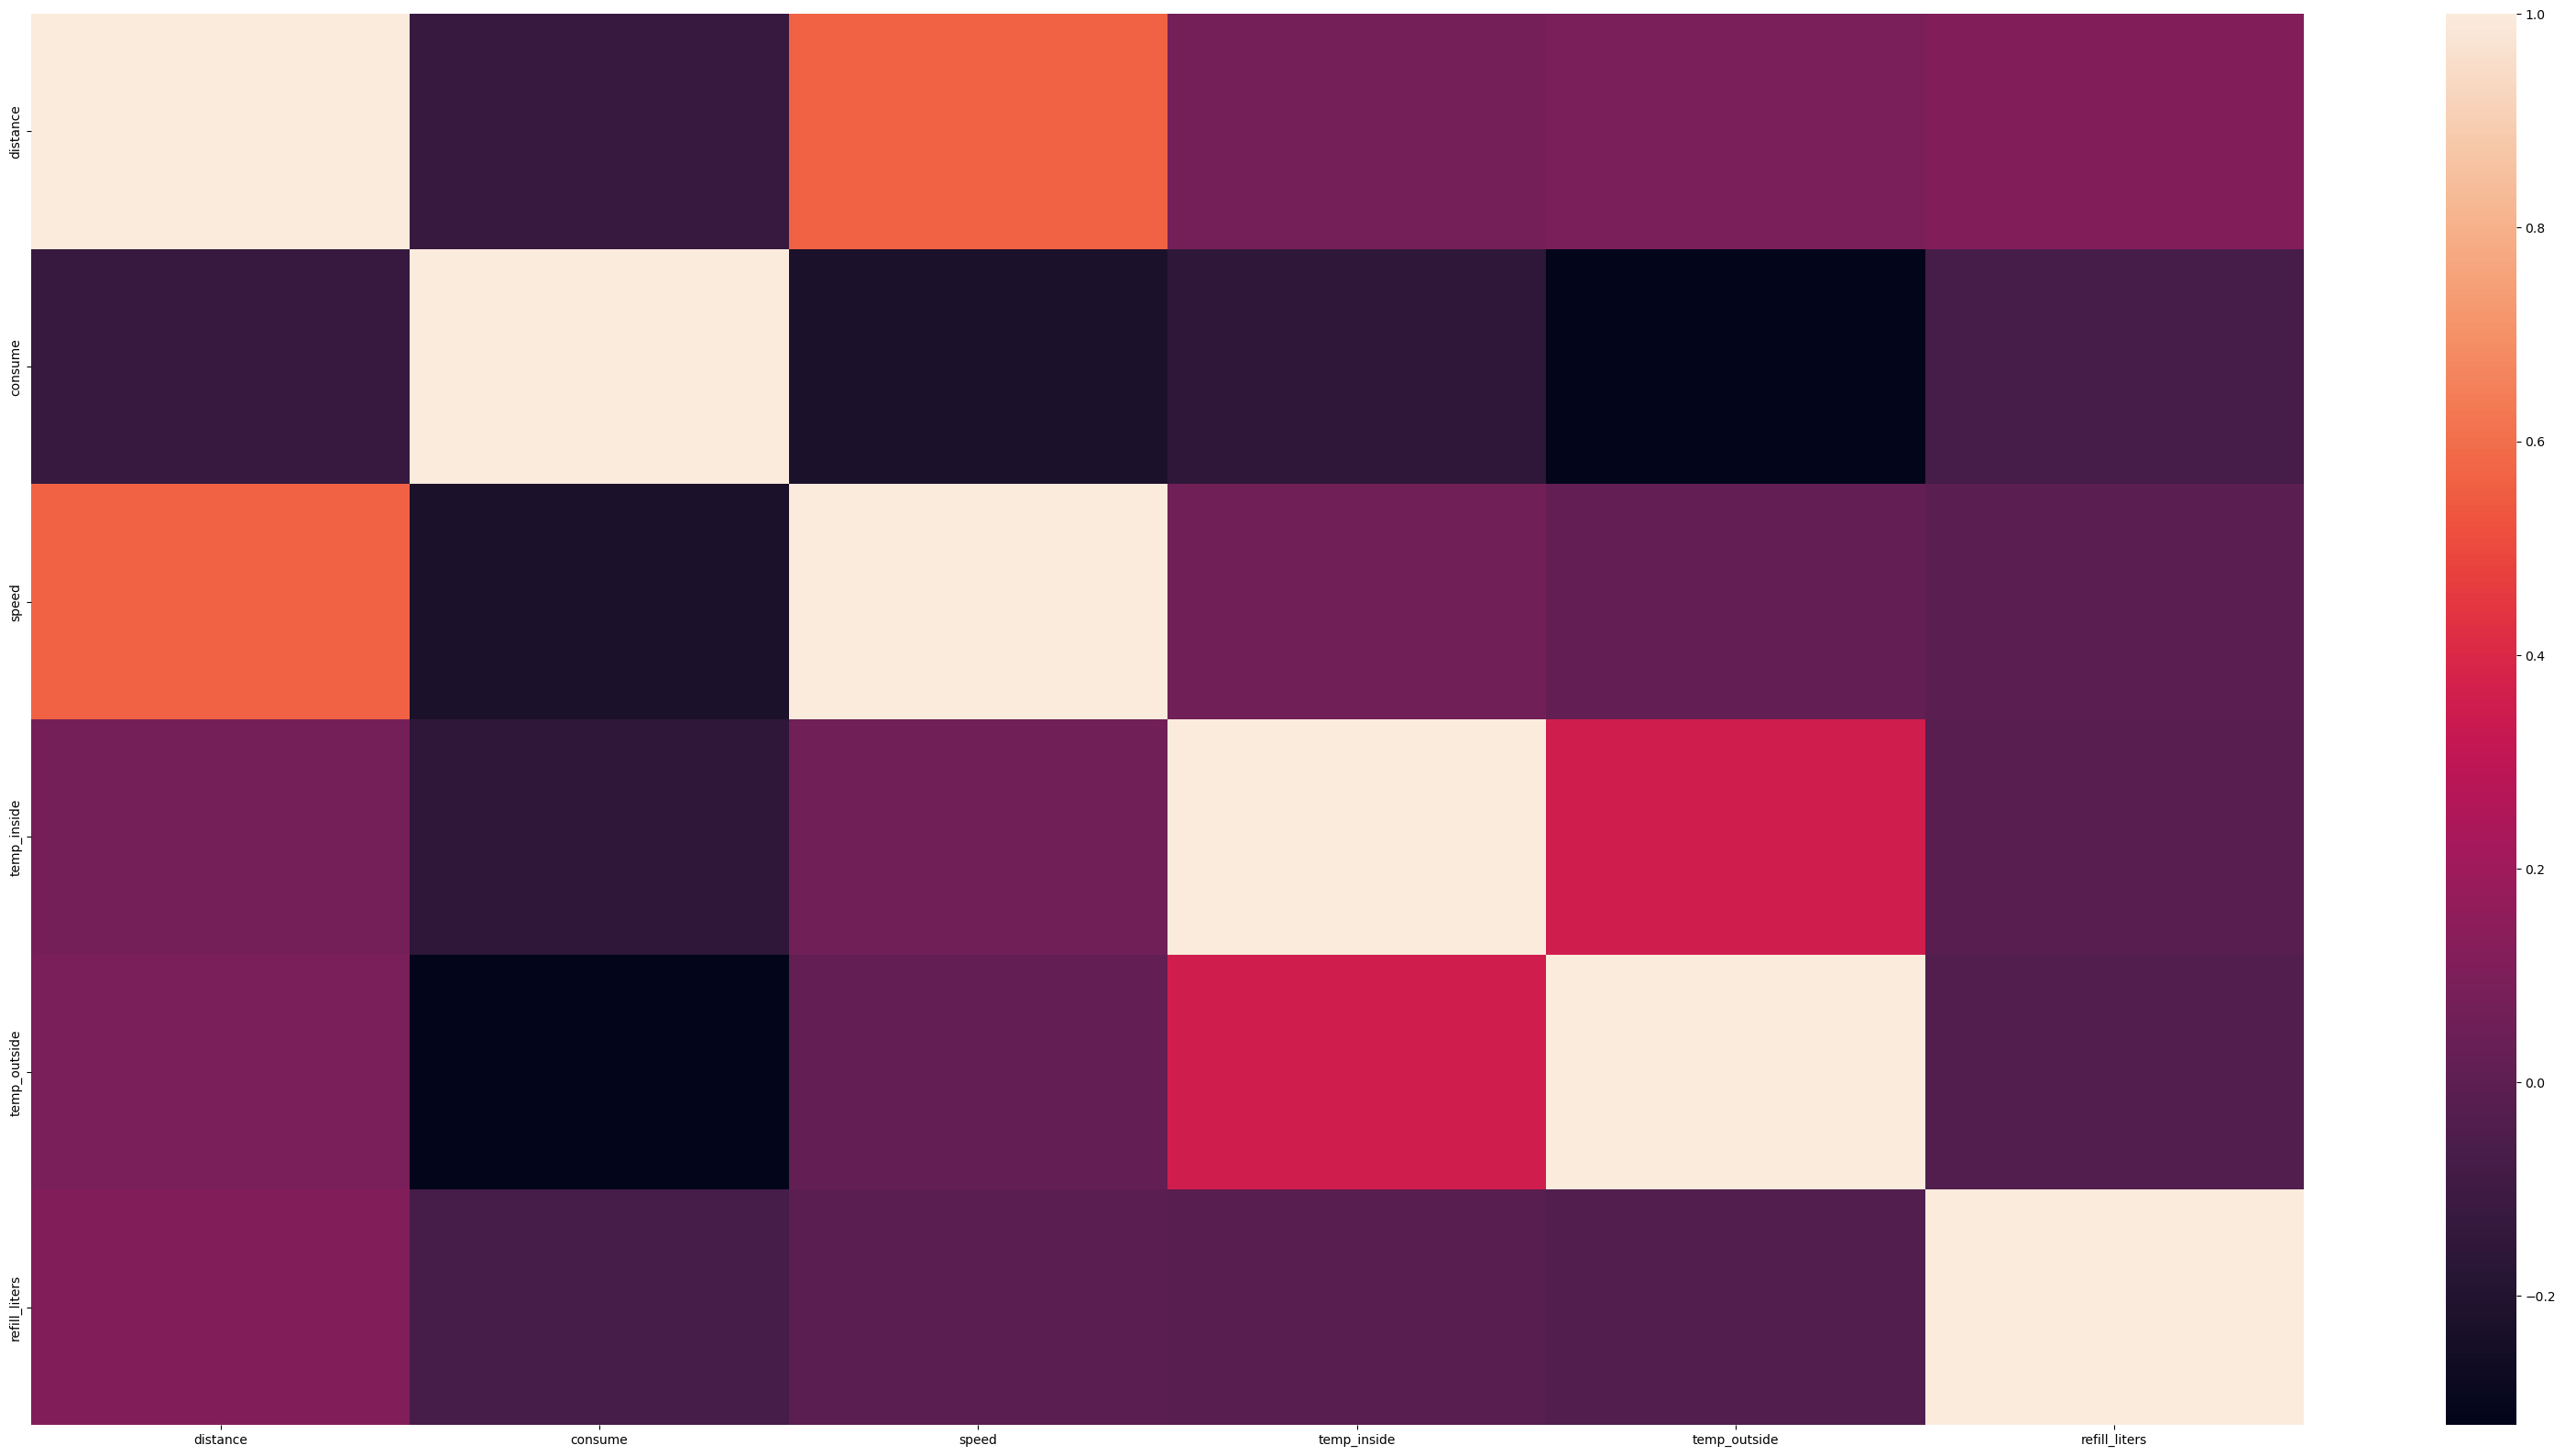

In [821]:
plt.figure(figsize=(40,20))
sns.heatmap(numerical_df.corr(), annot= False)

In [825]:
df_tableau = df.drop(columns=["specials", "rain", "sun"], axis=1)

In [826]:
df_tableau

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,E10,OFF,45,E10
1,12.0,4.2,30,21.5,13,E10,OFF,0,None
2,11.2,5.5,38,21.5,15,E10,OFF,0,None
3,12.9,3.9,36,21.5,14,E10,OFF,0,None
4,18.5,4.5,46,21.5,15,E10,OFF,0,None
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,OFF,0,None
384,16.1,4.3,38,25.0,31,SP98,ON,0,None
385,16.0,3.8,45,25.0,19,SP98,OFF,0,None
386,15.4,4.6,42,25.0,31,SP98,ON,0,None


In [827]:
df_tableau.to_excel('measurements_tableau_df.xlsx', index=False)


I couldnt get until predictions but as you can see in my tableau, the amount of the gas spent depends on the speed and if the AC is OFF and ON. Which I recommend to use the gas type that has better results with the AC ON because, in my personal opinion, is more common to have the AC ON than OFF. 